1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [ ]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

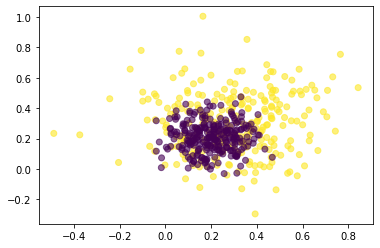

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def g_dataset(size,stand_dev1,mean1,stand_dev2, mean2):
    x1 = np.random.normal(stand_dev1,mean1, size)
    y1 = np.random.normal(stand_dev1,mean1, size)
    colors1 = np.full(size, 4)
    x2 = np.random.normal(stand_dev2,mean2, size)
    y2 = np.random.normal(stand_dev2,mean2, size)
    colors2 = np.full(size, 0)
    x = np.concatenate([x1, x2])
    y = np.concatenate([y1, y2])
    colors = np.concatenate([colors1, colors2])
    return x, y, colors
    
x, y, colors = g_dataset(size=260, mean1= 0.2, stand_dev1=0.3, mean2=0.1, stand_dev2=0.2)

plt.scatter(x, y, c=colors, alpha=0.6)
plt.show()

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]
       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


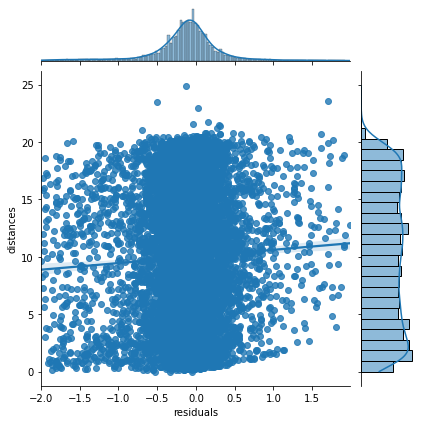

In [2]:
import pickle
import pandas as pd
file = 'residuals_261.pkl'
pickle_file = pd.read_pickle(file)
data = np.array(pickle_file, ndmin=1)[0]
df = pd.DataFrame(data, columns=['residuals', 'distances'])
print(df)
df_clean = df[abs(df['residuals']) < 2]
print(df_clean)
import seaborn as sns
sns.jointplot(x='residuals', y='distances', data=df_clean, kind='reg')

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


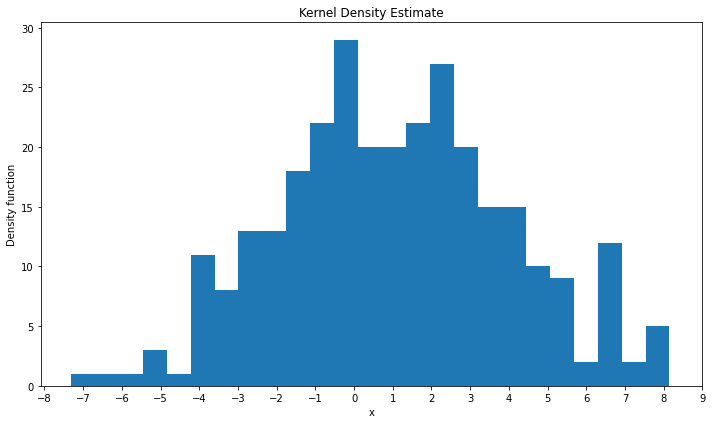

In [3]:
import math
np.random.seed(0)
mean, std, size = 1, 3, 300
x = np.random.normal(mean, std, size)
fig, ax = plt.subplots(figsize=(10, 6))
h, bins, _ = plt.hist(x, bins=25, histtype='barstacked')
ticks = list(range(math.floor(x.min()), math.ceil(x.max())+1))
ax.set_title('Kernel Density Estimate')
ax.set_xlabel('x')
ax.set_ylabel('Density function')
ax.set_xticks(ticks)
fig.tight_layout()